In [1]:

!pip uninstall keras tensorflow -y
!pip install tensorflow==2.13.0  # Phiên bản ổn định
!pip install keras==2.13.1        # Tương thích với TF


Found existing installation: keras 3.10.0
Uninstalling keras-3.10.0:
  Successfully uninstalled keras-3.10.0
Found existing installation: tensorflow 2.20.0
Uninstalling tensorflow-2.20.0:
  Successfully uninstalled tensorflow-2.20.0
     |████████████████████████████████| 524.1 MB 18 kB/s              
     |████████████████████████████████| 17.3 MB 12.7 MB/s            
     |████████████████████████████████| 1.7 MB 9.4 MB/s            
     |████████████████████████████████| 5.1 MB 9.2 MB/s            
     |████████████████████████████████| 5.6 MB 9.7 MB/s            
     |████████████████████████████████| 440 kB 10.3 MB/s            
     |████████████████████████████████| 294 kB 10.4 MB/s            
     |████████████████████████████████| 6.5 MB 7.6 MB/s            
     |████████████████████████████████| 6.5 MB 8.7 MB/s            
     |████████████████████████████████| 6.2 MB 10.1 MB/s            
     |████████████████████████████████| 221 kB 14.1 MB/s            
     |████

  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:
      Successfully uninstalled gast-0.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
optree 0.17.0 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.24.3 which is incompatible.


In [3]:
!pip uninstall protobuf -y
!pip install protobuf==3.20.3


Found existing installation: protobuf 4.25.8
Uninstalling protobuf-4.25.8:
  Successfully uninstalled protobuf-4.25.8
     |████████████████████████████████| 1.0 MB 2.0 MB/s            


In [1]:
!pip install "numpy<2" --force-reinstall --no-cache-dir
!pip install keras
!pip install tensorflow
!pip install optree
!pip install --upgrade numexpr>=2.8.4 bottleneck>=1.3.6 --no-cache-dir

     |████████████████████████████████| 18.2 MB 6.3 MB/s            
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.26.4 which is incompatible.


In [1]:

# Import những thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

2025-10-26 15:01:50.333216: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-26 15:01:50.335156: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-26 15:01:50.367164: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-26 15:01:50.368336: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-26 15:01:51.018725: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from IPython.display import Image
from matplotlib import pyplot as plt

In [3]:
!ping -c 3 spark-master
!curl spark-master:8080
!nc -zv spark-master 7077

/bin/bash: ping: command not found
/bin/bash: curl: command not found
Connection to spark-master 7077 port [tcp/*] succeeded!


In [4]:

# Kết nối đến Spark Master (đổi IP nếu khác)
spark = SparkSession.builder \
    .appName("Stock_Price_Vietnam") \
    .master("spark://spark-master:7077") \
    .getOrCreate()


25/10/26 15:02:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


# Một số phân tích cơ bản

Ta lấy dữ liệu dataframe từ spark như thông thường.

Ở đây ta so sánh dữ liệu chứng khoán của 5 công ty lớn:

#### FPT (mã FPT)

#### VinGroup (mã VIC)

#### Hòa Phát (mã HPG)

#### Thế giới di động (mã MWG)

#### Vietcombank (mã VCB)

#### Vinamilk (mã VNM)

In [5]:
df_FPT = spark.read.format("csv").option("header", "true")\
.option("inferSchema", "true").load("hdfs://namenode:9000/user/root/datack/stock_market_data-FPT_2025-10-24.csv")

df_MWG = spark.read.format("csv").option("header", "true")\
.option("inferSchema", "true").load("hdfs://namenode:9000/user/root/datack/stock_market_data-MWG_2025-10-24.csv")

df_HPG = spark.read.format("csv").option("header", "true")\
.option("inferSchema", "true").load("hdfs://namenode:9000/user/root/datack/stock_market_data-HPG_2025-10-24.csv")

df_VNM = spark.read.format("csv").option("header", "true")\
.option("inferSchema", "true").load("hdfs://namenode:9000/user/root/datack/stock_market_data-VNM_2025-10-24.csv")

df_VIC = spark.read.format("csv").option("header", "true")\
.option("inferSchema", "true").load("hdfs://namenode:9000/user/root/datack/stock_market_data-VIC_2025-10-24.csv")

df_VCB = spark.read.format("csv").option("header", "true")\
.option("inferSchema", "true").load("hdfs://namenode:9000/user/root/datack/stock_market_data-VCB_2025-10-24.csv")


In [43]:
df_test = spark.read.csv("hdfs://namenode:9000/user/root/datack/stock_market_data-HPG_2025-10-24.csv", header=True, inferSchema=True)
print("Rows:", df_test.count())
df_test.show(5)

Rows: 2700
+----+----------+----+----+----+-----+
| _c0|      Date|Open|High| Low|Close|
+----+----------+----+----+----+-----+
|2700|2015-01-05|3.44|3.51|3.41| 3.44|
|2699|2015-01-06|3.38|3.47|3.38| 3.47|
|2698|2015-01-07|3.47|3.51|3.44| 3.44|
|2697|2015-01-08|3.44|3.47|3.41| 3.44|
|2696|2015-01-09|3.44|3.51|3.41| 3.51|
+----+----------+----+----+----+-----+
only showing top 5 rows



In [44]:
from pyspark.sql.functions import year, expr

df_FPTmean = df_FPT.withColumn("Mean", expr('(High+Low)/2'))
df_MWGmean = df_MWG.withColumn("Mean", expr('(High+Low)/2'))
df_HPGmean = df_HPG.withColumn("Mean", expr('(High+Low)/2'))
df_VNMmean = df_VNM.withColumn("Mean", expr('(High+Low)/2'))
df_VICmean = df_VIC.withColumn("Mean", expr('(High+Low)/2'))
df_VCBmean = df_VCB.withColumn("Mean", expr('(High+Low)/2'))

In [45]:
df_FPTmean = df_FPTmean.toPandas()
df_MWGmean = df_MWGmean.toPandas()
df_HPGmean = df_HPGmean.toPandas()
df_VNMmean = df_VNMmean.toPandas()
df_VICmean = df_VICmean.toPandas()
df_VCBmean = df_VCBmean.toPandas()

Kết quả so sánh chỉ số trung bình trong ngày của các mã nói trên trong đồ thị

<Axes: xlabel='Date'>

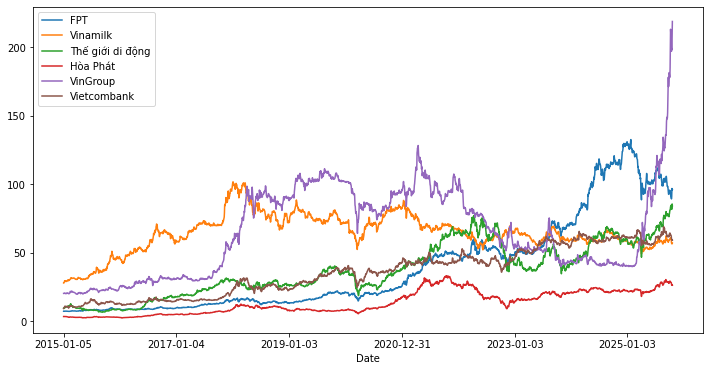

In [109]:
ax = df_FPTmean.plot(x='Date', y= 'Mean', label='FPT', figsize=(12,6))
df_VNMmean.plot(ax=ax, x= 'Date', y= 'Mean',label='Vinamilk')
df_MWGmean.plot(ax=ax, x= 'Date', y= 'Mean',label="Thế giới di động")
df_HPGmean.plot(ax=ax, x= 'Date', y= 'Mean',label='Hòa Phát')
df_VICmean.plot(ax=ax, x= 'Date', y= 'Mean',label='VinGroup')
df_VCBmean.plot(ax=ax, x= 'Date', y= 'Mean',label='Vietcombank')

In [114]:
df_FPTmean['Change']= (df_FPTmean['Close']/df_FPTmean['Close'].shift(1)) - 1 
df_VICmean['Change']= (df_VICmean['Close']/df_VICmean['Close'].shift(1)) - 1 
df_VCBmean['Change']= (df_VCBmean['Close']/df_VCBmean['Close'].shift(1)) - 1 
df_VNMmean['Change']= (df_VNMmean['Close']/df_VNMmean['Close'].shift(1)) - 1 
df_MWGmean['Change']= (df_MWGmean['Close']/df_MWGmean['Close'].shift(1)) - 1 
df_HPGmean['Change']= (df_HPGmean['Close']/df_HPGmean['Close'].shift(1)) - 1 

biểu đồ cột thể hiện sự thay đổi của các mã theo ngày

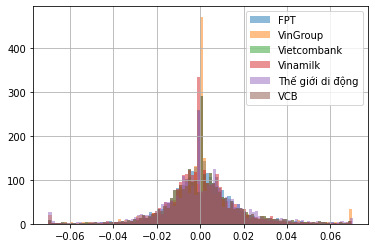

In [115]:

df_FPTmean['Change'].hist(bins=100, label='FPT',alpha=0.5)
df_VICmean['Change'].hist(bins=100, label='VinGroup', alpha=0.5)
df_VCBmean['Change'].hist(bins=100, label='Vietcombank', alpha=0.5)
df_VNMmean['Change'].hist(bins=100, label='Vinamilk', alpha=0.5)
df_MWGmean['Change'].hist(bins=100, label='Thế giới di động', alpha=0.5)
df_VCBmean['Change'].hist(bins=100, label='VCB', alpha=0.5)
plt.legend()

Biểu đồ trên thể hiện sự biến động của từng mã. Số lượng gần 0 càng nhiều chứng tỏ là mã càng biến động ít và ngược lại.

Ta vẽ biểu đồ đường để miêu tả rõ hơn điều đó

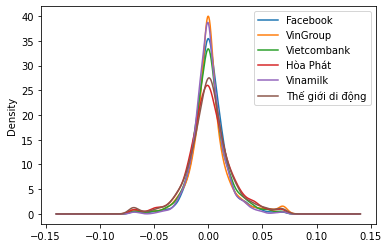

In [116]:
df_FPTmean['Change'].plot(kind= 'kde', label = 'Facebook')
df_VICmean['Change'].plot(kind= 'kde', label = 'VinGroup')
df_VCBmean['Change'].plot(kind= 'kde', label = 'Vietcombank')
df_HPGmean['Change'].plot(kind= 'kde', label = 'Hòa Phát')
df_VNMmean['Change'].plot(kind= 'kde', label = 'Vinamilk')
df_MWGmean['Change'].plot(kind= 'kde', label = 'Thế giới di động')
plt.legend()

# Dùng mô hình học máy để dự đoán tình hình chứng khoán

In [1]:
df = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load("hdfs://namenode:9000/user/root/datack/stock_market_data-VIC_2025-10-24.csv")

NameError: name 'spark' is not defined

In [ ]:
df.show(5)


+----+----------+-----+-----+-----+-----+
| _c0|      Date| Open| High|  Low|Close|
+----+----------+-----+-----+-----+-----+
|2700|2015-01-05|20.48|20.48|20.31|20.44|
|2699|2015-01-06|20.35|20.53|20.31|20.53|
|2698|2015-01-07|20.53|20.61| 20.4|20.48|
|2697|2015-01-08|20.48|20.78|20.48|20.61|
|2696|2015-01-09|20.61|20.87|20.53|20.53|
+----+----------+-----+-----+-----+-----+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import expr, col, column
df = df.withColumn("Mean", expr('(High+Low)/2'))  #Thêm một cột giá trị mean ( được tính bằng trung bình của low và high)

In [ ]:
df.show(5)


+----+----------+-----+-----+-----+-----+------------------+
| _c0|      Date| Open| High|  Low|Close|              Mean|
+----+----------+-----+-----+-----+-----+------------------+
|2700|2015-01-05|20.48|20.48|20.31|20.44|            20.395|
|2699|2015-01-06|20.35|20.53|20.31|20.53|             20.42|
|2698|2015-01-07|20.53|20.61| 20.4|20.48|            20.505|
|2697|2015-01-08|20.48|20.78|20.48|20.61|20.630000000000003|
|2696|2015-01-09|20.61|20.87|20.53|20.53|20.700000000000003|
+----+----------+-----+-----+-----+-----+------------------+
only showing top 5 rows



In [ ]:
asc_df = df.sort(df.Date.asc()) #Sắp xếp các cột theo tứ tự tăng dần của thời gian

In [ ]:
asc_df.show(5)

+----+----------+-----+-----+-----+-----+------------------+
| _c0|      Date| Open| High|  Low|Close|              Mean|
+----+----------+-----+-----+-----+-----+------------------+
|2700|2015-01-05|20.48|20.48|20.31|20.44|            20.395|
|2699|2015-01-06|20.35|20.53|20.31|20.53|             20.42|
|2698|2015-01-07|20.53|20.61| 20.4|20.48|            20.505|
|2697|2015-01-08|20.48|20.78|20.48|20.61|20.630000000000003|
|2696|2015-01-09|20.61|20.87|20.53|20.53|20.700000000000003|
+----+----------+-----+-----+-----+-----+------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import year
df_test = asc_df.filter(year("Date") > 2023) #tách ra tập test là tập gồm thông tin của năm 2020

In [ ]:
df_train = asc_df.subtract(df_test)   #tách ra tập train
df_train.count()

2249

In [ ]:
df_train = df_train.sort(df_train.Date.asc())   #sắp xếp lại tập train
df_train.show(5)

+----+----------+-----+-----+-----+-----+------------------+
| _c0|      Date| Open| High|  Low|Close|              Mean|
+----+----------+-----+-----+-----+-----+------------------+
|2700|2015-01-05|20.48|20.48|20.31|20.44|            20.395|
|2699|2015-01-06|20.35|20.53|20.31|20.53|             20.42|
|2698|2015-01-07|20.53|20.61| 20.4|20.48|            20.505|
|2697|2015-01-08|20.48|20.78|20.48|20.61|20.630000000000003|
|2696|2015-01-09|20.61|20.87|20.53|20.53|20.700000000000003|
+----+----------+-----+-----+-----+-----+------------------+
only showing top 5 rows



In [ ]:
dataset_train = df_train.toPandas()

In [ ]:
# Thuc hien scale du lieu gia ve khoang 0,1
training_set = dataset_train.iloc[:, 6:7].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Tạo dữ liệu train 
X_train = []
y_train = []
no_of_sample = len(training_set)

for i in range(60, no_of_sample):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Xây dựng model LSTM
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Nếu tồn tại model thì load lại nếu không thì thực hiện train 
if path.exists("mymodel.h5"):
    regressor.load_weights("mymodel.h5")
else:
    regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
    regressor.save("mymodel.h5")

In [ ]:
dataset_test = df_test.toPandas()
real_stock_price = dataset_test.iloc[:, 6:7].values

In [ ]:
# Tiến hành dự đoán 
dataset_total = pd.concat((dataset_train['Mean'], dataset_test['Mean']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
no_of_sample = len(inputs)

for i in range(60, no_of_sample):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

15/15 [==============================] - 1s 20ms/step


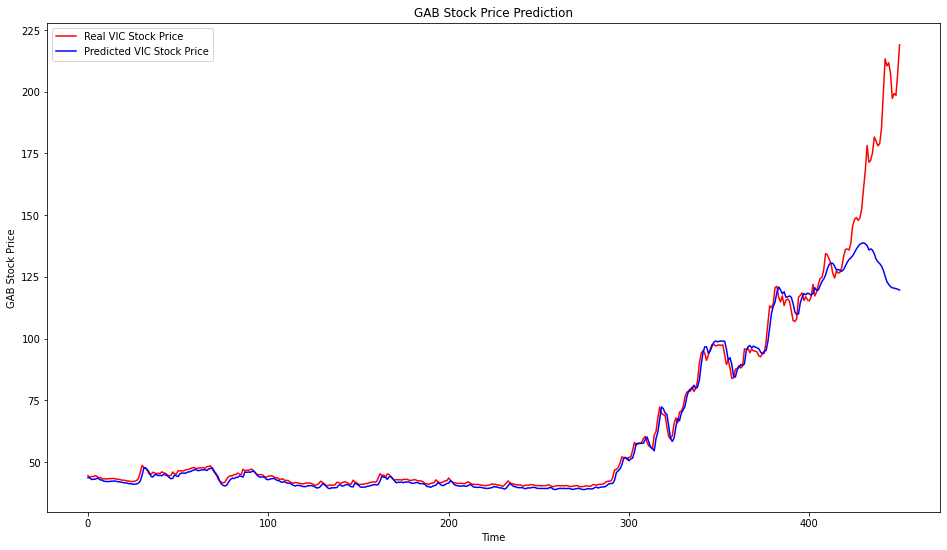

In [ ]:
# Ve bieu do gia that va gia du doan
plt.figure(figsize=(16,9))
plt.plot(real_stock_price, color = 'red', label = 'Real VIC Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted VIC Stock Price')
plt.title('GAB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GAB Stock Price')
plt.legend()
plt.show()